전체 학습 데이터의 개수: 25000
리뷰 길이 최댓값: 13710
리뷰 길이 최솟값: 54
리뷰 길이 평균값: 1329.71
리뷰 길이 표준편차: 1005.22
리뷰 길이 중간값: 983.0
리뷰 길이 제1사분위: 705.0
리뷰 길이 제3사분위: 1619.0


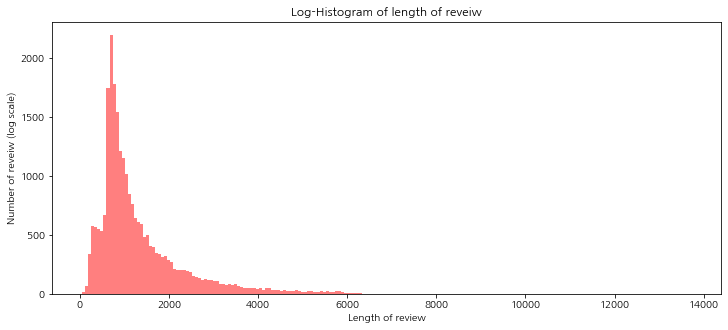

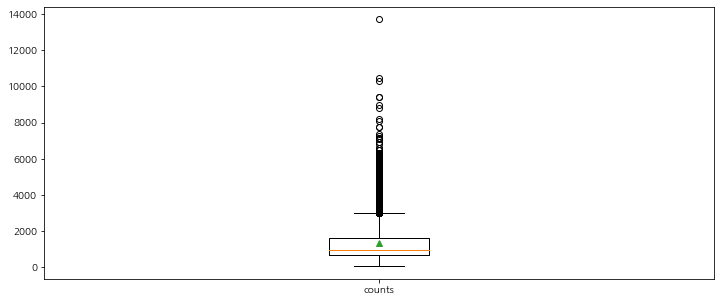

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


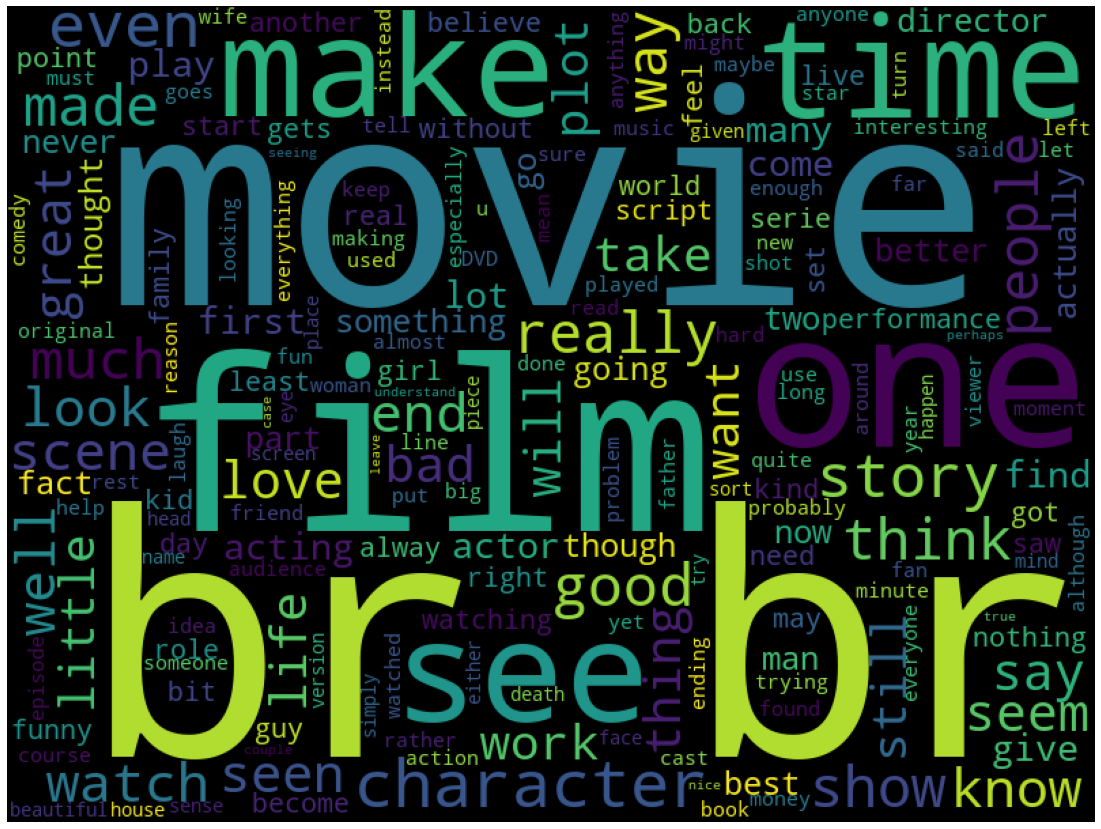

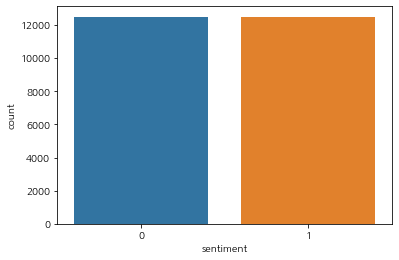

1    12500
0    12500
Name: sentiment, dtype: int64

긍정 리뷰 개수: 12500
부정 리뷰 개수: 12500


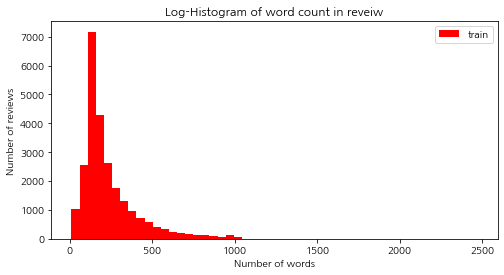

리뷰 단어 개수 최댓값: 2470
리뷰 단어 개수 최솟값: 10
리뷰 단어 개수 평균값: 233.79
리뷰 단어 개수 표준편차: 173.74
리뷰 단어 개수 중간값: 174.0
리뷰 단어 개수 제1사분위: 127.0
리뷰 단어 개수 제3사분위: 284.0
물음표가 있는 리뷰: 29.55
마침표가 있는 리뷰: 99.69
첫 글자가 대문자인 리뷰: 0.00
대문자가 있는 리뷰: 99.59
숫자가 있는 리뷰: 56.66


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# 학습 데이터를 읽어온다.
DATA_PATH = 'C:\\Users\\배진우\\Documents\\multiCampus_TA\\python_data\\'

train_data = pd.read_csv(DATA_PATH + 'labeledTrainData.tsv', header=0, sep='\t', quoting=3)
train_data.head()
# train_data.shape

print('전체 학습 데이터의 개수: {}'.format(len(train_data)))

train_length = train_data['review'].apply(len)
train_length.head()

plt.figure(figsize=(12,5))
plt.hist(train_length, bins=200, alpha=0.5, color='r', label='word')
# plt.yscale('log', nonposy='clip')
plt.title('Log-Histogram of length of reveiw')
plt.xlabel('Length of review')
plt.ylabel('Number of reveiw (log scale)')

print('리뷰 길이 최댓값: {}'.format(np.max(train_length)))
print('리뷰 길이 최솟값: {}'.format(np.min(train_length)))
print('리뷰 길이 평균값: {:.2f}'.format(np.mean(train_length)))
print('리뷰 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('리뷰 길이 중간값: {}'.format(np.median(train_length)))

# 사분위에 대한 경우는 0~100 스케일돼 있음.
print('리뷰 길이 제1사분위: {}'.format(np.percentile(train_length, 25)))
print('리뷰 길이 제3사분위: {}'.format(np.percentile(train_length, 75)))

plt.figure(figsize=(12,5))
plt.boxplot(train_length, labels=['counts'], showmeans=True)
plt.show()

from wordcloud import WordCloud
cloud = WordCloud(width=800, height=600).generate(" ".join(train_data['review']))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

fig, axe = plt.subplots(ncols=1)
# fig.set_size_inches(6, 3)
sns.countplot(train_data['sentiment'])
plt.show()

print(train_data['sentiment'].value_counts())
print("\n긍정 리뷰 개수: {}".format(train_data['sentiment'].value_counts()[1]))
print("부정 리뷰 개수: {}".format(train_data['sentiment'].value_counts()[0]))

train_word_counts = train_data['review'].apply(lambda x: len(x.split(' ')))

plt.figure(figsize=(8, 4))
plt.hist(train_word_counts, bins=50, facecolor='r', label='train')
plt.title('Log-Histogram of word count in reveiw')
# plt.yscale('log', nonposy = 'clip')
plt.legend()
plt.xlabel('Number of words')
plt.ylabel('Number of reviews')
plt.show()

print('리뷰 단어 개수 최댓값: {}'.format(np.max(train_word_counts)))
print('리뷰 단어 개수 최솟값: {}'.format(np.min(train_word_counts)))
print('리뷰 단어 개수 평균값: {:.2f}'.format(np.mean(train_word_counts)))
print('리뷰 단어 개수 표준편차: {:.2f}'.format(np.std(train_word_counts)))
print('리뷰 단어 개수 중간값: {}'.format(np.median(train_word_counts)))

# 사분위에 대한 경우는 0~100 스케일돼 있음.
print('리뷰 단어 개수 제1사분위: {}'.format(np.percentile(train_word_counts, 25)))
print('리뷰 단어 개수 제3사분위: {}'.format(np.percentile(train_word_counts, 75)))

qmarks = np.mean(train_data['review'].apply(lambda x: '?' in x))
fullstop = np.mean(train_data['review'].apply(lambda x: '.' in x))
capital_first = np.mean(train_data['review'].apply(lambda x: x[0].isupper()))
capitals = np.mean(train_data['review'].apply(lambda x: max([y.isupper() for y in x])))
numbers = np.mean(train_data['review'].apply(lambda x: max([y.isdigit() for y in x])))

print('물음표가 있는 리뷰: {:.2f}'.format(qmarks * 100))
print('마침표가 있는 리뷰: {:.2f}'.format(fullstop * 100))
print('첫 글자가 대문자인 리뷰: {:.2f}'.format(capital_first * 100))
print('대문자가 있는 리뷰: {:.2f}'.format(capitals * 100))
print('숫자가 있는 리뷰: {:.2f}'.format(numbers * 100))

In [2]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import nltk
import re
from nltk.stem import PorterStemmer
import pickle
import numpy as np

nltk.download('punkt')
nltk.download('stopwords')

# 학습 데이터를 읽어온다.
DATA_PATH = 'C:\\Users\\배진우\\Documents\\multiCampus_TA\\python_data\\'

train_data = pd.read_csv(DATA_PATH + 'labeledTrainData.tsv', header=0, sep='\t', quoting=3)
train_data['review'][0]

# Pre-processing
stemmer = PorterStemmer()
stopwords = nltk.corpus.stopwords.words('english')

clean_text = []
for review in train_data['review']:
    # 1. 영문자와 숫자만 사용한다. 그 이외의 문자는 공백 문자로 대체한다.
    review = review.replace('<br />', ' ')       # <br> --> space
    review = review.replace('\'', '')            # dont't --> dont
    review = re.sub("[^a-zA-Z]", ' ', review)    # 영문자만 사용

    tmp = []
    for word in nltk.word_tokenize(review):
        # 2. 불용어 처리
        # 'e.g' 같은 경우는 'e g'로 처리된 상태임. 한글자 짜리 word는 버림.
        if len(word.lower()) > 1 and word.lower() not in stopwords:
            # 3. Stemming
            tmp.append(stemmer.stem(word.lower()))
    clean_text.append(' '.join(tmp))

clean_text[0]

tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_text)
text_sequences = tokenizer.texts_to_sequences(clean_text)

print(text_sequences[0])

word2idx = tokenizer.word_index   # idx는 1부터 부여됨.
word2idx["<PAD>"] = 0
print(word2idx)

print("전체 단어 개수:", len(word2idx))

MAX_SEQ_LENGTH = 174  # 한 문장의 최대 길이
train_inputs = pad_sequences(text_sequences,
                             maxlen=MAX_SEQ_LENGTH,
                             padding='post')
print('Shape of train data: ', train_inputs.shape)

train_labels = np.array(train_data['sentiment'])
print('Shape of label tensor: ', train_labels.shape)

# 학습 데이터를 저장해 둔다.
with open(DATA_PATH + 'popcorn.pkl', 'wb') as f:
    pickle.dump([clean_text, train_inputs, train_labels, word2idx], f, pickle.DEFAULT_PROTOCOL)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\배진우\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\배진우\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[476, 24, 176, 6918, 127, 89, 900, 87, 11, 807, 517, 11, 12921, 11, 7871, 210, 49, 9, 743, 1521, 81, 101, 15, 569, 3002, 210, 7, 209, 667, 2200, 911, 7871, 63, 3570, 63, 293, 2, 261, 24, 10, 365, 92, 287, 1198, 590, 6918, 62, 622, 2120, 26, 520, 590, 735, 23, 31100, 526, 394, 197, 417, 1447, 838, 1405, 4, 6918, 459, 24, 436, 61, 193, 125, 174, 6918, 7728, 8404, 7, 1, 6918, 128, 14, 38, 34, 128, 212, 15, 216, 68, 293, 2, 129, 143, 89, 104, 7297, 2931, 1013, 352, 825, 7729, 559, 3604, 280, 735, 1350, 49, 6918, 300, 23, 660, 6918, 15879, 674, 10065, 825, 7729, 8, 3806, 49, 22, 37, 3060, 735, 464, 8596, 210, 436, 6918, 87, 71, 569, 35, 4, 6918, 97, 385, 1353, 151, 1593, 1181, 352, 26, 65, 139, 4126, 3191, 341, 2, 4832, 23, 352, 282, 65, 436, 40, 3, 144, 172, 521, 151, 694, 60, 997, 410, 17, 1199, 121, 1, 22, 4, 6918, 3, 465, 82, 29, 22, 450, 177, 54, 57, 5578, 590, 1256, 6918, 25248, 1384, 1, 91, 417, 1447, 324, 3, 317, 22, 56, 1224, 1022, 2200, 16, 604, 127, 463, 606, 5579, 16, 33, 37, 22

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import pickle

DATA_PATH = 'C:\\Users\\배진우\\Documents\\multiCampus_TA\\python_data\\'

# 학습 데이터를 읽어온다.
with open(DATA_PATH + 'popcorn.pkl', 'rb') as f:
    x_text, _, y_target, _ = pickle.load(f)

vectorizer = TfidfVectorizer(min_df=0.0, analyzer="char", sublinear_tf=True,
                             ngram_range=(1, 3), max_features=5000)
x_feat = vectorizer.fit_transform(x_text)

# 학습 데이터와 시험 데이터로 분리한다.
x_train, x_eval, y_train, y_eval = train_test_split(x_feat, y_target, test_size=0.2)
x_train.shape, x_eval.shape, y_train.shape, y_eval.shape

lgs = LogisticRegression(class_weight = 'balanced')
lgs.fit(x_train, y_train)

print('Accuracy: {:.4f}'.format(lgs.score(x_eval, y_eval)))

Accuracy: 0.8574
